# <h1><center>BIG DATA PROJECT ON MOVIE DATASET</center></h1>
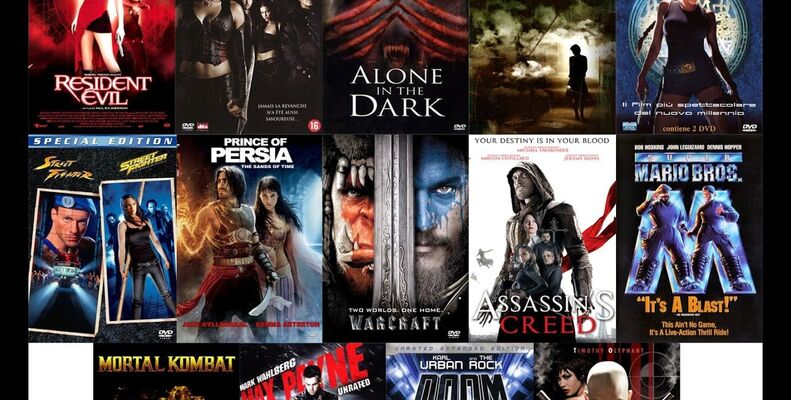

Movie dataset obtained from kaggle.com . This is a dataset contain movie information of different years. It contain movie names,ratings, langauge and other information about movies. The dataset having a size of 482MB. We use Pyspark in Databricks to perform analytical operations on dataset

## Objective

. Understand the data and its structure

. Add and remove columns as per as requirement

. Group the tables based on conditions

. Use pandas and matplotlib libraries for ploting

. Create a program for movie suggestion to user based on some questions


## Importng packages that required for project

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
from pyspark.sql.functions import year,desc,when,month
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import split, explode, col
from pyspark.sql.functions import udf

Creating an entry point for spark

In [11]:
spark= SparkSession.builder.appName('project').getOrCreate()

creating a dataframe in spark and printing it's Structure

In [12]:
table= spark.read.csv('/home/pranav/umar project/dataset/TMDB_movie_dataset_v11.csv',header=True,inferSchema=True,encoding='utf-8')
table.show()
table.printSchema()

+------+--------------------+------------+----------+--------+------------+----------+-------+-----+--------------------+---------+--------------------+---------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    id|               title|vote_average|vote_count|  status|release_date|   revenue|runtime|adult|       backdrop_path|   budget|            homepage|  imdb_id|original_language|      original_title|            overview|          popularity|         poster_path|             tagline|              genres|production_companies|production_countries|    spoken_languages|            keywords|
+------+--------------------+------------+----------+--------+------------+----------+-------+-----+--------------------+---------+--------------------+---------+-----------------+--------------------+-----------------

# Identifing columns names ,no.of rows and columns, null values in each columns 

In [4]:
for i in table.columns:
    print(i)

print('..........................')

print(f'No.of columns of table = {len(table.columns)}')
print('..........................')

print(f'No.of rows of table = {table.count()}')
print('..........................')

null = {i:table.filter(table[i].isNull()).count() for i in table.columns}
print(null)

id
title
vote_average
vote_count
status
release_date
revenue
runtime
adult
backdrop_path
budget
homepage
imdb_id
original_language
original_title
overview
popularity
poster_path
tagline
genres
production_companies
production_countries
spoken_languages
keywords
..........................
No.of columns of table = 24
..........................
No.of rows of table = 1023755
..........................


{'id': 0, 'title': 12, 'vote_average': 0, 'vote_count': 0, 'status': 0, 'release_date': 126436, 'revenue': 10, 'runtime': 0, 'adult': 3, 'backdrop_path': 737049, 'budget': 49, 'homepage': 913040, 'imdb_id': 446258, 'original_language': 87, 'original_title': 36, 'overview': 188220, 'popularity': 17, 'poster_path': 277701, 'tagline': 836653, 'genres': 377995, 'production_companies': 529130, 'production_countries': 419807, 'spoken_languages': 410429, 'keywords': 714005}


# Analysis on Data

## Analysis 1: Top 5 Year having most No.of Movies Released and graph of last 10 year movie count

In [5]:
#step1,step2

Anls1 = table.select('id','title','release_date')
Anls1.show()

+------+--------------------+------------+
|    id|               title|release_date|
+------+--------------------+------------+
| 27205|           Inception|  2010-07-15|
|157336|        Interstellar|  2014-11-05|
|   155|     The Dark Knight|  2008-07-16|
| 19995|              Avatar|  2009-12-15|
| 24428|        The Avengers|  2012-04-25|
|293660|            Deadpool|  2016-02-09|
|299536|Avengers: Infinit...|  2018-04-25|
|   550|          Fight Club|  1999-10-15|
|118340|Guardians of the ...|  2014-07-30|
|   680|        Pulp Fiction|  1994-09-10|
|    13|        Forrest Gump|  1994-06-23|
|   671|Harry Potter and ...|  2001-11-16|
|  1726|            Iron Man|  2008-04-30|
| 68718|    Django Unchained|  2012-12-25|
|   278|The Shawshank Red...|  1994-09-23|
|299534|   Avengers: Endgame|  2019-04-24|
|   603|          The Matrix|  1999-03-30|
|   597|             Titanic|  1997-11-18|
|475557|               Joker|  2019-10-01|
|   120|The Lord of the R...|  2001-12-18|
+------+---

In [6]:
#step3

null = Anls1.filter(Anls1['release_date'].isNull()).count()
print(null)

df= Anls1.filter(Anls1['release_date'].isNotNull())
null=df.filter(df['release_date'].isNull()).count()
print(null)

126436
0


In [7]:
#step 4

df = df.withColumn("release_date",df["release_date"].cast("date"))
df.printSchema()

df = df.withColumn("release_year", year(df["release_date"]))
df.show()

root
 |-- id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- release_date: date (nullable = true)

+------+--------------------+------------+------------+
|    id|               title|release_date|release_year|
+------+--------------------+------------+------------+
| 27205|           Inception|  2010-07-15|        2010|
|157336|        Interstellar|  2014-11-05|        2014|
|   155|     The Dark Knight|  2008-07-16|        2008|
| 19995|              Avatar|  2009-12-15|        2009|
| 24428|        The Avengers|  2012-04-25|        2012|
|293660|            Deadpool|  2016-02-09|        2016|
|299536|Avengers: Infinit...|  2018-04-25|        2018|
|   550|          Fight Club|  1999-10-15|        1999|
|118340|Guardians of the ...|  2014-07-30|        2014|
|   680|        Pulp Fiction|  1994-09-10|        1994|
|    13|        Forrest Gump|  1994-06-23|        1994|
|   671|Harry Potter and ...|  2001-11-16|        2001|
|  1726|            Iron Man|  2008-04-3

In [8]:
#step 5 , step 6

df= df.filter(df['release_year']<=2024)
df=df.groupBy('release_year').count()
sorted_Df= df.orderBy(desc('count'))
out = sorted_Df.limit(5)

print('The Most No.of Movies Are Released :')
out.show()

The Most No.of Movies Are Released :


+------------+-----+
|release_year|count|
+------------+-----+
|        2022|42275|
|        2021|42042|
|        2019|40135|
|        2023|39357|
|        2020|39288|
+------------+-----+



+------------+-----+
|release_year|count|
+------------+-----+
|        2024| 6916|
|        2023|39357|
|        2022|42275|
|        2021|42042|
|        2020|39288|
|        2019|40135|
|        2018|36243|
|        2017|33895|
|        2016|30509|
|        2015|28952|
+------------+-----+



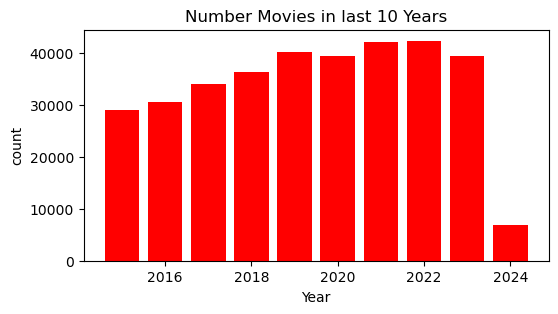

In [9]:
sorted_Df= df.orderBy(desc('release_year'))
result = sorted_Df.limit(10)
result.show()


df_pd= result.toPandas()
plt.figure(figsize=(6,3))
plt.bar(df_pd['release_year'],df_pd['count'],color='red')
plt.title('Number Movies in last 10 Years')
plt.xlabel('Year')
plt.ylabel('count')
plt.show()

## Analysis2 : Top 10 Languages that most No.of movies released

In [10]:
#step1

Anls2 = table.select('id','title','original_language')
Anls2.show()

+------+--------------------+-----------------+
|    id|               title|original_language|
+------+--------------------+-----------------+
| 27205|           Inception|               en|
|157336|        Interstellar|               en|
|   155|     The Dark Knight|               en|
| 19995|              Avatar|               en|
| 24428|        The Avengers|               en|
|293660|            Deadpool|               en|
|299536|Avengers: Infinit...|               en|
|   550|          Fight Club|               en|
|118340|Guardians of the ...|               en|
|   680|        Pulp Fiction|               en|
|    13|        Forrest Gump|               en|
|   671|Harry Potter and ...|               en|
|  1726|            Iron Man|               en|
| 68718|    Django Unchained|               en|
|   278|The Shawshank Red...|               en|
|299534|   Avengers: Endgame|               en|
|   603|          The Matrix|               en|
|   597|             Titanic|           

In [11]:
#step 2

dv = Anls2.select('original_language').distinct()
print(f' no.of unique years in actual table {dv.count()}')

null = Anls2.filter(Anls2['original_language'].isNull()).count()
print(f'count of null values on actual table {null}')

df = Anls2.filter(Anls2['original_language'].isNotNull())
null =df.filter(df['original_language'].isNull()).count()
print(f'count of null values after deleting {null}')

 no.of unique years in actual table 192
count of null values on actual table 87
count of null values after deleting 0


In [12]:
# step3

out2= df.groupBy('original_language').count()
out2= out2.orderBy(desc('count'))
out2= out2.limit(10)
out2.show()

+-----------------+------+
|original_language| count|
+-----------------+------+
|               en|551399|
|               fr| 61754|
|               es| 52639|
|               de| 51577|
|               ja| 44721|
|               pt| 28799|
|               zh| 24477|
|               it| 22504|
|               ru| 22050|
|               ko| 12391|
+-----------------+------+



In [13]:
#step 4

conditions = {"en": "English","fr": "French","es": "Spanish","de": "German","ja": "Japanese","pt": "Portuguese","zh": "Chinese","it": "Italian","ru": "Russian","ko": "Korean"}
def newcolumn(value):
    if value in list(conditions.keys()):
        return conditions[value]


myfn = udf(newcolumn)
df = out2.withColumn('language', myfn(out2['original_language']))
# df.show()


## Analysis3: No.of movies in each season

In [14]:
Anls3 = table.select('id','title','release_date')
df = Anls3.withColumn("release_month", month(Anls3["release_date"]))
df = df.filter(df['release_month']<=12)
df = df.withColumn('season',when(df['release_month'].isin(12,1,2),'winter')
                   .when(df['release_month'].isin(3,4,5),'spring')
                   .when(df['release_month'].isin(6,7,8),'summer')
                   .when(df['release_month'].isin(9,10,11),'autumn'))
df=df.groupBy('season').count()
df.show()

+------+------+
|season| count|
+------+------+
|winter|319378|
|summer|173268|
|spring|185223|
|autumn|219339|
+------+------+



## Analysis4 : no.of movies in each vote range

In [38]:
new= table.select('id','title','vote_average')
new.show()
null=new.filter(new['vote_average'].isNull()).count()
print(null)

+------+--------------------+------------+
|    id|               title|vote_average|
+------+--------------------+------------+
| 27205|           Inception|       8.364|
|157336|        Interstellar|       8.417|
|   155|     The Dark Knight|       8.512|
| 19995|              Avatar|       7.573|
| 24428|        The Avengers|        7.71|
|293660|            Deadpool|       7.606|
|299536|Avengers: Infinit...|       8.255|
|   550|          Fight Club|       8.438|
|118340|Guardians of the ...|       7.906|
|   680|        Pulp Fiction|       8.488|
|    13|        Forrest Gump|       8.477|
|   671|Harry Potter and ...|       7.916|
|  1726|            Iron Man|        7.64|
| 68718|    Django Unchained|       8.171|
|   278|The Shawshank Red...|       8.702|
|299534|   Avengers: Endgame|       8.263|
|   603|          The Matrix|       8.206|
|   597|             Titanic|         7.9|
|475557|               Joker|       8.168|
|   120|The Lord of the R...|       8.402|
+------+---

table not contain any null values so not deleting any rows here

In [16]:
df = new.withColumn('vote_range',when(new['vote_average']>=9,'above 9')
                .when((new['vote_average']>=8)&(new['vote_average']<9),'between 8 and 9')
                .when((new['vote_average']>=7)&(new['vote_average']<8),'between 7 and 8')
                .when((new['vote_average']>=6)&(new['vote_average']<7),'between 6 and 7')
                .when((new['vote_average']>=5)&(new['vote_average']<6),'between 5 and 6')
                .when((new['vote_average']>=4)&(new['vote_average']<5),'between 4 and 5')
                .when((new['vote_average']>=3)&(new['vote_average']<4),'between 3 and 4')
                .when((new['vote_average']>=2)&(new['vote_average']<3),'between 2 and 3')
                .when((new['vote_average']>=1)&(new['vote_average']<2),'between 1 and 2')
                .otherwise('below 1'))

df= df.groupBy('vote_range').count()
df.orderBy(desc('count')).show()

+---------------+------+
|     vote_range| count|
+---------------+------+
|        below 1|677039|
|between 6 and 7| 85288|
|between 5 and 6| 79449|
|between 7 and 8| 50497|
|between 4 and 5| 36018|
|        above 9| 33384|
|between 8 and 9| 26656|
|between 3 and 4| 15032|
|between 2 and 3| 12766|
|between 1 and 2|  7626|
+---------------+------+



## Analysis 5:
## last 10 years with below output 
## 1.movie that got highest number of rating
## 2.movie that cost highest budget
## 3.movie that got highest revenue 

In [13]:
df = table.filter(table['release_date'].isNotNull())
df = df.withColumn("release_date",df["release_date"].cast("date"))
df = df.withColumn("year", year(df["release_date"]))

solution of 

-- creating 3 table with title, year are common on all tables and vote_count,budget,revenue are different in 3 tables
-- create 2 list with table names and diffrent columns
-- using for iterating each table name and applying filtering operations
-- filter out data with year above 2013 and below 2024
-- printing schema of each columns
-- converting vote count column in to integer data type. 
-- finding the maximum values of requirement column in each year by grouping

-- join the actual and maximum valued table to get movie name
-- printing last 10 years data with conditions


In [14]:
A_df = df.select('title','year','vote_count')
B_df = df.select('title','year','budget')
C_df = df.select('title','year','revenue')


a = [A_df,B_df,C_df]
b = ['vote_count','budget','revenue']

for i in range(len(a)):
    df = a[i].filter((a[i]['year']>=2013)&(a[i]['year']<2024))
    df = df.withColumn(b[i],df[b[i]].cast('integer'))
    df.printSchema()
    
    df1 = df.groupBy('year').agg(f.max(b[i]).alias(b[i]))
    result = a[i].join(df1, [b[i]], "inner")
    new= result.select('title',df1['year'],df1[b[i]])
    
    print(f"movies that get highest {b[i]} in last 10 year")
    new.orderBy('year').show()

root
 |-- title: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- vote_count: integer (nullable = true)

movies that get highest vote_count in last 10 year


+--------------------+----+----------+
|               title|year|vote_count|
+--------------------+----+----------+
|The Wolf of Wall ...|2013|     22222|
|        Interstellar|2014|     32571|
|Avengers: Age of ...|2015|     21754|
|            Deadpool|2016|     28894|
|Spider-Man: Homec...|2017|     20507|
|Avengers: Infinit...|2018|     27713|
|   Avengers: Endgame|2019|     23857|
|Birds of Prey (an...|2020|      9654|
|Spider-Man: No Wa...|2021|     18299|
|Avatar: The Way o...|2022|      9830|
|The Super Mario B...|2023|      6743|
+--------------------+----+----------+

root
 |-- title: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- budget: integer (nullable = true)

movies that get highest budget in last 10 year


+--------------------+----+---------+
|               title|year|   budget|
+--------------------+----+---------+
|Pirates of the Ca...|2007|300000000|
|Pirates of the Ca...|2007|300000000|
|Harry Potter and ...|2009|250000000|
|Harry Potter and ...|2009|250000000|
|Harry Potter and ...|2009|250000000|
|Harry Potter and ...|2010|250000000|
|Harry Potter and ...|2010|250000000|
|Harry Potter and ...|2010|250000000|
|The Dark Knight R...|2012|250000000|
|The Hobbit: An Un...|2012|250000000|
|The Dark Knight R...|2012|250000000|
|The Hobbit: An Un...|2012|250000000|
|         John Carter|2012|250000000|
|The Hobbit: An Un...|2012|250000000|
|         John Carter|2012|250000000|
|         John Carter|2012|250000000|
|The Dark Knight R...|2012|250000000|
|The Hobbit: The D...|2013|250000000|
|The Hobbit: The D...|2013|250000000|
|The Hobbit: The D...|2013|250000000|
+--------------------+----+---------+
only showing top 20 rows

root
 |-- title: string (nullable = true)
 |-- year: integer (

+--------------------+----+----------+
|               title|year|   revenue|
+--------------------+----+----------+
|              Frozen|2013|1274219009|
|Transformers: Age...|2014|1104054072|
|Star Wars: The Fo...|2015|2068223624|
|Captain America: ...|2016|1155046416|
|Star Wars: The La...|2017|1332698830|
|Avengers: Infinit...|2018|2052415039|
|       The Lion King|2019|1663075401|
|Demon Slayer -Kim...|2020| 503063688|
|Spider-Man: No Wa...|2021|1921847111|
|   Top Gun: Maverick|2022|1488732821|
|              Barbie|2023|1428545028|
+--------------------+----+----------+



## Analysis 6: Analysis on genres


the actual table contain genre column. And that column contain multiple values are seperated with comma
so creating a new column to existing table called genre

In [26]:
new= table.select('id','title','genres','release_date')
df = new.withColumn("genre_list", split(col("genres"), ","))
df = df.select("id", "title", explode(col("genre_list")).alias("genre"), year('release_date').alias('year'))
df.show()

+------+--------------------+--------------------+----+
|    id|               title|               genre|year|
+------+--------------------+--------------------+----+
| 27205|           Inception|Your mind is the ...|2010|
|157336|        Interstellar|           Adventure|2014|
|157336|        Interstellar|               Drama|2014|
|157336|        Interstellar|     Science Fiction|2014|
|   155|     The Dark Knight|               Drama|2008|
|   155|     The Dark Knight|              Action|2008|
|   155|     The Dark Knight|               Crime|2008|
|   155|     The Dark Knight|            Thriller|2008|
| 19995|              Avatar|              Action|2009|
| 19995|              Avatar|           Adventure|2009|
| 19995|              Avatar|             Fantasy|2009|
| 19995|              Avatar|     Science Fiction|2009|
| 24428|        The Avengers|     Science Fiction|2012|
| 24428|        The Avengers|              Action|2012|
| 24428|        The Avengers|           Adventur

## which type of genre is released most in this dataset?

In [27]:
out= df.groupBy('genre').count()
out = out.orderBy(desc('count'))

out.orderBy(desc('count')).limit(1).show()

+-----+------+
|genre| count|
+-----+------+
|Drama|149598|
+-----+------+



## which type of genre released most in last 10 years

-- this operation is also going to work on basis of above genre table that we created
-- here we group our table based on 2 columns, that are year and genre
-- filtering our table with year above 2014 and below 2024 also applied some filter condition to make output more clear

-- also applied a user selecting operation here as,
    user can choose an year and there is a result table printed which will contain no.of movies released in that year with different genres

In [28]:
out= df.groupBy('year','genre').count()
out = out.filter((out['count']>1) & (out['year']>=2014) & (out['year']<=2024) & (out['genre']!='0.6'))
out.show()

a = int(input('select year u want to know:'))
out = out.filter(out['year']==a)
out.orderBy(desc('count')).show()

+----+----------------+-----+
|year|           genre|count|
+----+----------------+-----+
|2021|         History|  476|
|2014|         History|  328|
|2019|         Western|   37|
|2015|       Adventure|  332|
|2014|          Comedy| 2190|
|2022|         Western|   67|
|2021|           Music|  545|
|2018|       Adventure|  417|
|2015|           Music|  357|
|2022| Science Fiction|  526|
|2023|           Crime|  493|
|2023|       Adventure|  487|
|2015|         Western|   44|
|2020|         Fantasy|  622|
|2021|           Drama| 2043|
|2014|          Family|  316|
|2023|          Action|  529|
|2019|        TV Movie|  152|
|2023|         Fantasy|  275|
|2014| Science Fiction|  332|
+----+----------------+-----+
only showing top 20 rows

select year u want to know:2020


+----+---------------+-----+
|year|          genre|count|
+----+---------------+-----+
|2020|    Documentary| 7718|
|2020|          Drama| 5694|
|2020|         Comedy| 2623|
|2020|      Animation| 1926|
|2020|         Horror| 1800|
|2020|          Drama| 1701|
|2020|         Comedy| 1214|
|2020|       Thriller| 1063|
|2020|          Music| 1059|
|2020|        Romance|  923|
|2020|        Romance|  791|
|2020|         Action|  707|
|2020|       Thriller|  674|
|2020|         Horror|  635|
|2020|        Fantasy|  622|
|2020|          Music|  525|
|2020|       TV Movie|  510|
|2020|         Family|  482|
|2020|        Mystery|  475|
|2020|Science Fiction|  451|
+----+---------------+-----+
only showing top 20 rows



## which type of genre have high average runtime

In [69]:
df = table.withColumn("genre_list", split(col("genres"), ", "))
df = df.select("title", explode(col("genre_list")).alias("genre"), year('release_date').alias('year'),'runtime')
df= df.withColumn('runtime',df['runtime'].cast('integer'))
df.show()
df.printSchema()

+--------------------+--------------------+----+-------+
|               title|               genre|year|runtime|
+--------------------+--------------------+----+-------+
|           Inception|Your mind is the ...|2010|    148|
|        Interstellar|           Adventure|2014|    169|
|        Interstellar|               Drama|2014|    169|
|        Interstellar|     Science Fiction|2014|    169|
|     The Dark Knight|               Drama|2008|    152|
|     The Dark Knight|              Action|2008|    152|
|     The Dark Knight|               Crime|2008|    152|
|     The Dark Knight|            Thriller|2008|    152|
|              Avatar|              Action|2009|    162|
|              Avatar|           Adventure|2009|    162|
|              Avatar|             Fantasy|2009|    162|
|              Avatar|     Science Fiction|2009|    162|
|        The Avengers|     Science Fiction|2012|    143|
|        The Avengers|              Action|2012|    143|
|        The Avengers|         

In [70]:
a=['Action','Adventure','Comedy','Drama','Horror','Thriller','Mystery','Crime','Science Fiction','Fantasy','Romance','Animation','Family','Western','War','Documentary','TV Movie','History']
result=  df.filter(df['genre'].isin(a))
result= result.groupBy('genre').agg(f.avg("runtime").alias("avg_runtime"))
result = result.withColumn("avg_runtime", f.round("avg_runtime", 2))
result.orderBy(desc('avg_runtime')).show()

+---------------+-----------+
|          genre|avg_runtime|
+---------------+-----------+
|         Action|      78.49|
|        Romance|      77.07|
|          Crime|      73.31|
|        History|       71.6|
|            War|      71.57|
|       Thriller|      71.14|
|       TV Movie|       70.8|
|      Adventure|      70.05|
|        Mystery|      64.72|
|          Drama|      64.58|
|        Western|      59.36|
|         Comedy|      56.17|
|         Family|      55.41|
|Science Fiction|      55.26|
|        Fantasy|       54.9|
|         Horror|      53.91|
|    Documentary|      45.66|
|      Animation|      20.03|
+---------------+-----------+



# Movie Suggession

In [6]:
df = table.withColumn("genre_list", split(col("genres"), ", "))
df = df.select("id", "title", explode(col("genre_list")).alias("genre"), year('release_date').alias('year'),'vote_average')

In [7]:
print('WELCOME TO MOVIE SUGGESION')
print('..............................')
while True:
    a= input('''Select One Option
    1 for Movies in single Year
    2 for Movies in a range of Year
    3 for Movies in a exit
    :''')

    if a=='1':
        year=int(input('enter the Year Your want to Search? :'))
        if year>2024:
            print('Invalid Entry')
        
        else:
            imdb_score = int(input('''choose a imdb score range
            9 for above 9
            8 for above 8
            7 for above 7
            6 for above 6
            5 for above 5
            4 for above 4
            3 for above 3
            2 for above 2
            1 for above 1
            0 for no choice 
            :'''))

            genre=input('''choose which genre you need 
            Action
            Adventure
            Comedy
            Drama
            Horror
            Thriller
            Mystery
            Crime
            Science Fiction
            Fantasy
            Romance
            Animation
            Family
            Western
            War
            Documentary
            TV Movie
            History
            Note: if u selecting more than one genre use , for seperation
            :''')
            genre_list= genre.split(',')
            genre_list=[i.capitalize() for i in genre_list]
            
            result= df.filter((df['year']==year) & (df['vote_average']>=imdb_score) & (df['genre'].isin(genre_list)) )
            c = int(input('how many movies u need based on above conditions:'))
            result.show(n=c)
            
            cont = input('Do you want to search other movies(y/n)?').lower()
            if cont=='n':
                break

    elif a=='2':
        start= int(input('enter the starting year :'))
        end= int(input('enter the ending year :'))
        if start>2024 or end>=2024:
            print('Invalid Entry')
        else:
            imdb_score = int(input('''choose a imdb score range
            9 for above 9
            8 for above 8
            7 for above 7
            6 for above 6
            5 for above 5
            4 for above 4
            3 for above 3
            2 for above 2
            1 for above 1
            0 for no choice 
            :'''))

            genre=input('''choose which genre you need 
            Action
            Adventure
            Comedy
            Drama
            Horror
            Thriller
            Mystery
            Crime
            Science Fiction
            Fantasy
            Romance
            Animation
            Family
            Western
            War
            Documentary
            Note: if u selecting more than one genre use , for seperation
            :''')
            
            genre_list= genre.split(',')
            genre_list=[i.capitalize() for i in genre_list]
            
            result= df.filter((df['year']>=start)&(df['year']<=end) & (df['vote_average']>=imdb_score) & (df['genre'].isin(genre_list)) )
            c = int(input('how many movies u need based on above conditions:'))
            result.show(n=c)
            # p = input('choose column for ordering table(year/vote_average:)')
            # final=result.orderBy(p).show(n=c)
            

    elif a=='3':
        print('Thank you')
        break
    else:
        print('Invalid entry')

WELCOME TO MOVIE SUGGESION
..............................
Select One Option
    1 for Movies in single Year
    2 for Movies in a range of Year
    3 for Movies in a exit
    :1
enter the Year Your want to Search? :2018
choose a imdb score range
            9 for above 9
            8 for above 8
            7 for above 7
            6 for above 6
            5 for above 5
            4 for above 4
            3 for above 3
            2 for above 2
            1 for above 1
            0 for no choice 
            :8
choose which genre you need 
            Action
            Adventure
            Comedy
            Drama
            Horror
            Thriller
            Mystery
            Crime
            Science Fiction
            Fantasy
            Romance
            Animation
            Family
            Western
            War
            Documentary
            TV Movie
            History
            Note: if u selecting more than one genre use , for seperation
       